<div align="center">
    
# Multiple Linear Regression Analysis

## Overview

This dataset includes a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales.

The features in the data are:

* TV promotional budget (in "Low," "Medium," and "High" categories)
* Social media promotional budget (in millions of dollars)
* Radio promotional budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in "Mega," "Macro," "Micro," and "Nano" categories)

## Executive Summary

A multiple linear regression model using `TV` and `Radio` promotional budgets as predictors explains 90.4% of the variation in sales. This high level of accuracy makes the model a powerful tool for guiding marketing investment decisions.

The results suggest that high TV promotional budgets significantly increase sales, while radio promotions also contribute positively. Specifically:

- Moving from a high to medium TV budget is associated with a 75.3 million dollar decrease in sales.
- Moving from high to low TV budget results in a 154.3 million dollar decrease in sales.
- Every additional 1 million dollars spent on radio promotion yields an estimated 3 million dollar increase in sales.

Recommendation: To maximize sales, prioritize high-budget TV promotions and continue investing in radio advertising.

## Data & Methodology

This project uses a **multiple linear regression** model to examine how marketing spend across different channels impacts product `Sales`. The model aims to identify which channels contribute most to sales performance and provide actionable insights for budget allocation.

Multiple linear regression models the relationship between a dependent variable and two or more independent variables using the following general form:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \varepsilon
$$

$$
\begin{align*}
\beta_0 &\text{: Intercept} \\
\beta_1, \beta_2, \dots, \beta_n &\text{: Coefficients representing the effect of each predictor} \\
\varepsilon &\text{: Error term (unexplained variation)}
\end{align*}
$$

This method allows us to:
- Quantify the effect of each marketing channel on `Sales`
- Assess statistical significance and confidence in the results
- Predict future sales given specific marketing budgets

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Load and preview the dataset

In [2]:
data = pd.read_csv('marketing_sales_data_v2.csv')

In [3]:
# Preview the first few rows
data.head()

TV      Radio  Social Media Influencer       Sales
0     Low   3.518070      2.293790      Micro   55.261284
1     Low   7.756876      2.572287       Mega   67.574904
2    High  20.348988      1.227180      Micro  272.250108
3  Medium  20.108487      2.728374       Mega  195.102176
4    High  31.653200      7.776978       Nano  273.960377

In [4]:
# Check data types and structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [5]:
# Summary statistics for numeric columns
data.describe()

Radio  Social Media       Sales
count  572.000000    572.000000  572.000000
mean    17.520616      3.333803  189.296908
std      9.290933      2.238378   89.871581
min      0.109106      0.000031   33.509810
25%     10.699556      1.585549  118.718722
50%     17.149517      3.150111  184.005362
75%     24.606396      4.730408  264.500118
max     42.271579     11.403625  357.788195

## Exploratory Data Analysis (EDA)

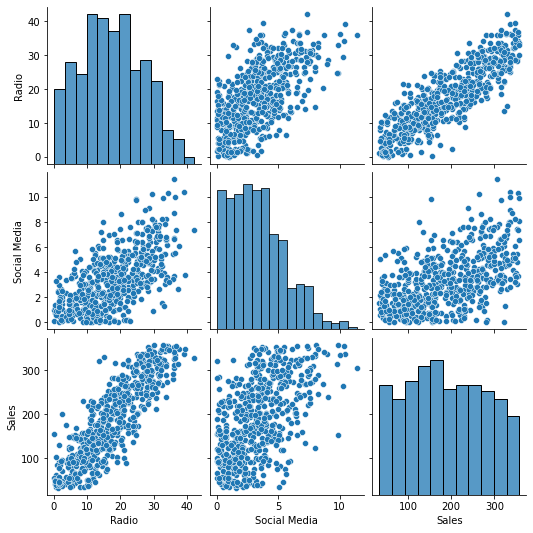

In [6]:
sns.pairplot(data)

Both `Radio` and `Social Media` show apparent linear relationships with `Sales`, suggesting they may serve as effective independent variables in a multiple linear regression model to predict `Sales`.

Note that `TV` and `Influencer` were excluded from the pairplot analysis because they are non-numeric variables.

In [7]:
# Calculate and display mean Sales for each TV promotion category
mean_sales_by_tv = data.groupby('TV')['Sales'].mean()
print("Mean Sales by TV Promotion Category:")
print(mean_sales_by_tv)

print()  # Blank line for readability

# Calculate and display mean Sales for each Influencer category
mean_sales_by_influencer = data.groupby('Influencer')['Sales'].mean()
print("Mean Sales by Influencer Category:")
print(mean_sales_by_influencer)

Mean Sales by TV Promotion Category:
TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

Mean Sales by Influencer Category:
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


Average `Sales` are significantly higher for the `High` `TV` promotion category compared to `Medium` and `Low`, suggesting that `TV` may be a strong predictor of `Sales`.

While the `Influencer` categories show some variation in average `Sales`, the differences are relatively small. This indicates that `Influencer` may be a weaker predictor of `Sales`.

These observations can be explored further during the multiple linear regression analysis.

In [8]:
# Remove rows with missing values and update the DataFrame
data = data.dropna(axis=0)

# Rename columns to ensure compatibility with the ols() function
# (e.g., remove spaces from column names)
data = data.rename(columns={'Social Media': 'Social_Media'})

## Model Development

In [9]:
# Define and fit the OLS regression model
model = ols('Sales ~ C(TV) + Radio', data=data).fit()

# Display the summary of regression results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):          1.63e-288
Time:                        19:36:33   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- `TV` was included in the model based on earlier analysis, which showed a strong association between TV promotional budgets and average `Sales`.

- `Radio` was selected due to the clear linear relationship observed in the pairplot between `Radio` spending and `Sales`.

- `Social Media` was excluded because it did not improve model performance and was later found to be correlated with another predictor, `Radio`.

- `Influencer` was also excluded, as it showed only a weak relationship with `Sales` in the preliminary analysis.

## Model Assumption Checks

### Linearity

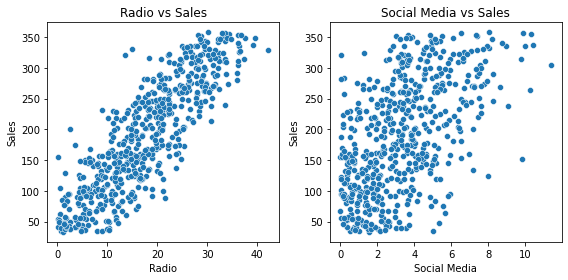

In [10]:
# Create a side-by-side (1x2) figure to assess linearity between predictors and Sales
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Scatterplot: Radio vs Sales
sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axes[0])
axes[0].set_title("Radio vs Sales")
axes[0].set_xlabel("Radio")
axes[0].set_ylabel("Sales")

# Scatterplot: Social Media vs Sales
sns.scatterplot(x=data['Social_Media'], y=data['Sales'], ax=axes[1])
axes[1].set_title("Social Media vs Sales")
axes[1].set_xlabel("Social Media")
axes[1].set_ylabel("Sales")

# Adjust spacing to prevent overlap
plt.tight_layout()

The linearity assumption appears to hold for `Radio`, as the scatterplot shows a clear linear relationship with `Sales`.  

Although `Social Media` was not included in the previous multiple linear regression model, its scatterplot also suggests a potential linear relationship with `Sales`.

### Independence

The independent observation assumption requires that each observation in the dataset is independent of the others. Since each row represents a separate and unrelated marketing promotion, this assumption is reasonably satisfied.

### Normality

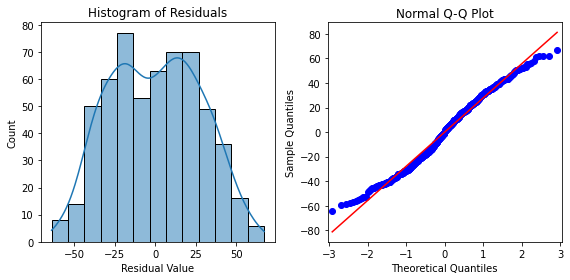

In [11]:
# Calculate residuals from the fitted model
residuals = model.resid

# Create a 1x2 subplot to visualize the distribution of residuals
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot histogram of residuals
sns.histplot(residuals, ax=axes[0], kde=True)
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

# Plot Q-Q plot to assess normality
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_title("Normal Q-Q Plot")

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

The histogram of the residuals suggests they are approximately normally distributed, supporting the normality assumption of the model.  

Additionally, the residuals in the Q-Q plot closely follow a straight line, providing further evidence that the normality assumption is satisfied.

### Constant variance

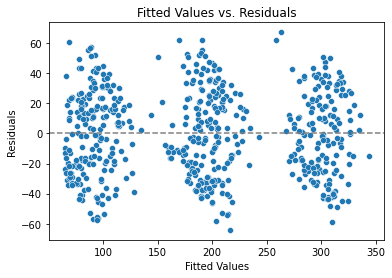

In [12]:
# Create a scatterplot of fitted values vs residuals to assess constant variance
fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)

# Label axes and set title
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values vs. Residuals")

# Add a horizontal reference line at y = 0
fig.axhline(0, color='gray', linestyle='--')

# Display the plot
plt.show()

The fitted values appear in three distinct groups, reflecting the influence of the categorical variable `TV`. This indicates that `TV` is a dominant factor in predicting `Sales`.

Despite the grouping, the spread of residuals within each group appears relatively consistent, suggesting that the constant variance (homoscedasticity) assumption is reasonably satisfied.

### No multicollinearity

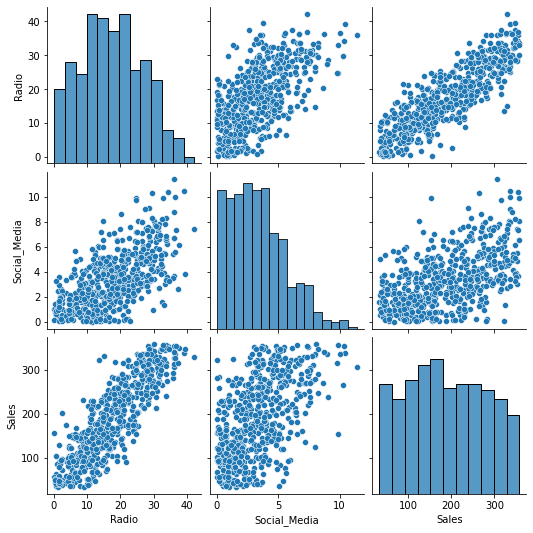

In [13]:
sns.pairplot(data)

In [14]:
# Check for multicollinearity using Variance Inflation Factor (VIF)

# Import the VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select continuous independent variables from the dataset
X = data[['Radio', 'Social_Media']]

# Calculate VIF for each variable
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame to display VIF results
df_vif = pd.DataFrame({'VIF': vif}, index=X.columns)

# Display the VIF table
df_vif

VIF
Radio         5.170922
Social_Media  5.170922

The current model includes only one continuous independent variable (`Radio`), so multicollinearity is not a concern.

However, if both `Radio` and `Social_Media` were included as predictors, a moderate linear relationship between them would violate the no multicollinearity assumption. In fact, the Variance Inflation Factor (VIF) for both variables in that scenario is 5.17, which indicates a high level of multicollinearity.

### Model Results & Interpretation

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):          1.63e-288
Time:                        19:36:36   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression equation and coefficients

The final multiple linear regression model uses `TV` (a categorical variable with levels: High, Medium, Low) and `Radio` (a continuous variable) to predict `Sales`.

$$
\text{Sales} = \beta_0 + \beta_{TVLow} \cdot X_{TVLow} + \beta_{TVMedium} \cdot X_{TVMedium} + \beta_{Radio} \cdot X_{Radio}
$$

The fitted coefficient values are:

* $\beta_{0} =  218.5261$
* $\beta_{TVLow}= -154.2971$
* $\beta_{TVMedium} = -75.3120$
* $\beta_{Radio} =  2.9669$

Substituting these into the equation:

$$
\text{Sales} = 218.5261 - 154.2971 \cdot X_{TVLow} - 75.3120 \cdot X_{TVMedium} + 2.9669 \cdot X_{Radio}
$$

### Statistical significance and p-values

All predictors in the model are statistically significant with p-values less than 0.001. This means there is strong evidence that each predictor is associated with changes in `Sales`.

### R-squared and Model Fit

The model has an \( R^2 \) value of 0.904, indicating that 90.4% of the variation in `Sales` is explained by the `TV` and `Radio` variables. This reflects a very strong model fit.

### 95% Confidence Intervals

The 95% confidence intervals for the coefficients are:

- TV (Low vs High): [–163.979, –144.616]
- TV (Medium vs High): [–82.431, –68.193]
- Radio: [2.551, 3.383]

These intervals do not include zero, further confirming the significance of each predictor.

### Interpretation of Key Predictors

- **TV Promotion Level**:  
  Sales are significantly higher when the `TV` promotion level is "High". Switching to "Medium" or "Low" results in a decrease in expected sales:
  - High → Medium: Sales decrease by approximately \$75.3 million
  - High → Low: Sales decrease by approximately \$154.3 million

- **Radio Budget**:  
  Every additional $\$$1 million spent on radio is associated with a $\$$2.97 million increase in sales, on average.

## Key Insights

### What drives sales?

- High TV promotional budgets are the strongest predictor of increased sales.
- Radio spending also contributes positively to sales performance, with a strong linear relationship.

### Comparison between TV categories

- The model clearly shows diminishing returns as TV promotional budget decreases:
  - High TV budget results in the highest sales.
  - Medium and Low TV budgets result in significantly lower performance.

### Impact of radio spend

- Radio promotion is consistently effective, with a substantial return on investment (nearly 3x return per $\$$1 million).

### Summary of Actionable Insights

- Invest heavily in high-tier TV promotions whenever possible.
- Maintain or increase radio promotional budgets to support incremental sales gains.
- Avoid budget cuts in TV that drop campaigns into the "Medium" or "Low" categories.

## Recommendations & Next Steps

Based on the findings, here are strategic and technical recommendations:

### Strategic recommendations for budgeting

- Prioritize allocating budget toward **High TV** promotions.
- Support TV campaigns with strong **Radio** promotion to maximize incremental sales impact.

### Potential model improvements

- Refine `TV` variable by using actual dollar amounts or breaking into more detailed categories.
- Include additional predictors such as:
  - Campaign **location**
  - **Seasonality** or **time of year**
  - Channel **interaction effects** (e.g., TV × Radio)

### Suggestions for further analysis

- Use the model for scenario planning: estimate expected sales under different budget combinations.
- Visualize fitted vs actual values to validate prediction accuracy.
- Explore non-linear models or tree-based models if interactions or thresholds are suspecte